In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# Process and clean data

In [13]:
import os

i = 0
directory = '/kaggle/input/minecraft-skins/skins'
files = os.listdir(directory)
for file in files:
    if os.path.isfile(os.path.join(directory, file)) and file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif")):
        i += 1

print(i)


7930


In [14]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="PIL")

In [15]:
import os
import pandas as pd
import cv2
from tqdm import tqdm

def save_image_info(image_dir, output_file):
    data = []
    columns = ["Image Path", "Width", "Height", "Channels"]
    errors = []

    file_list = [file for file in os.listdir(image_dir) if file.lower().endswith(".png")]

    pbar = tqdm(file_list, desc="Processing Images")

    for file in pbar:
        image_path = os.path.join(image_dir, file)
        if os.path.isfile(image_path):
            try:
                image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
                if image is not None:
                    height, width, channels = image.shape
                    data.append([image_path, width, height, channels])
                else:
                    errors.append(f"Unable to read {image_path} with cv2.imread()")
            except Exception as e:
                errors.append(f"Error processing {image_path}: {str(e)}")
                continue

    pbar.close()

    df = pd.DataFrame(data, columns=columns)
    df.to_csv(output_file, index=False)

    print(len(data))  # Print the count of unique images

    if errors:
        print("Error messages:")
        for error in errors:
            print(error)

# Example usage:
image_dir = "/kaggle/input/minecraft-skins-hq-classified/skins-classified/bad_/bad"
output_file = "/kaggle/working/image_info.csv"

save_image_info(image_dir, output_file)


Processing Images: 100%|██████████| 213981/213981 [17:10<00:00, 207.64it/s]


213981


In [16]:
image_df = pd.read_csv(output_file)
image_df

Image Path  Width  Height  \
0       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
1       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
2       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
3       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
4       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
...                                                   ...    ...     ...   
213976  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213977  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213978  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213979  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213980  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   

        Channels  
0              4  
1              4  
2              4  
3              4  
4              4  
...          ...  
213976         4  
213977         4  
213978         4  
213979         4  
213980         4  

[213981 rows x 4 columns]

In [17]:
image_df["Image Name"] = image_df["Image Path"].apply(lambda path: path.split("/")[-1])
image_df

Image Path  Width  Height  \
0       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
1       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
2       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
3       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
4       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
...                                                   ...    ...     ...   
213976  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213977  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213978  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213979  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213980  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   

        Channels          Image Name  
0              4  521884--3.0292.png  
1              4  319494--0.7793.png  
2              4  424578--3.4898.png  
3              4  228778--3.1197.png  
4              4  284771--0.5043.png  
...          ...                 ...  
213976         4  198687--2.6983.png  
213977         4  105895--2.3293.png  
213978         4    7821--2.8862.png  
213979         4  238266--1.1212.png  
213980         4  315845--1.8055.png  

[213981 rows x 5 columns]

In [18]:
image_df_stieve = image_df[image_df['Height'] == 64]
image_df_stieve

Image Path  Width  Height  \
0       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
1       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
2       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
3       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
4       /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
...                                                   ...    ...     ...   
213976  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213977  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213978  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213979  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   
213980  /kaggle/input/minecraft-skins-hq-classified/sk...     64      64   

        Channels          Image Name  
0              4  521884--3.0292.png  
1              4  319494--0.7793.png  
2              4  424578--3.4898.png  
3              4  228778--3.1197.png  
4              4  284771--0.5043.png  
...          ...                 ...  
213976         4  198687--2.6983.png  
213977         4  105895--2.3293.png  
213978         4    7821--2.8862.png  
213979         4  238266--1.1212.png  
213980         4  315845--1.8055.png  

[213981 rows x 5 columns]

In [19]:
image_df_stieve['Channels'].unique()

array([4])

# Read Images

In [20]:
import pandas as pd
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2


class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        if idx >= len(self.dataframe):
            raise IndexError(f"Index {idx} out of range for dataframe")

        image_path = self.dataframe.iloc[idx, self.dataframe.columns.get_loc("Image Path")]

        # Read the image with alpha channel using OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

        # Convert BGR image to RGBA
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)

        if self.transform is not None:
            # Convert image to PIL Image
            image_pil = Image.fromarray(image)

            # Apply transformations
            image_pil = self.transform(image_pil)

            # Convert PIL Image back to numpy array
            image = np.array(image_pil)

        return image

# Define the transformation to apply to the images
transform = transforms.ToTensor()

# Create an instance of the custom dataset
dataset = CustomDataset(image_df_stieve, transform=transform)

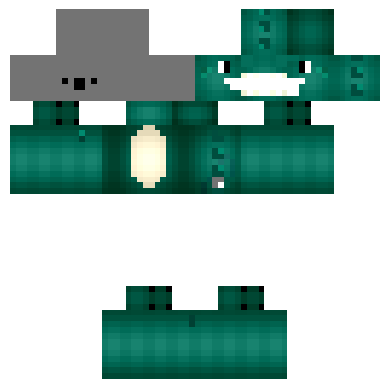

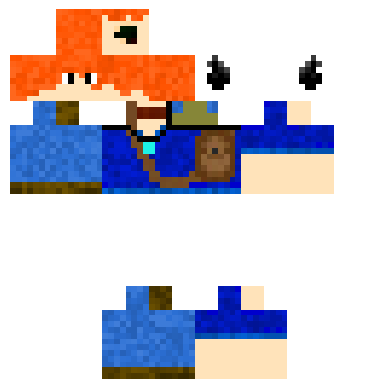

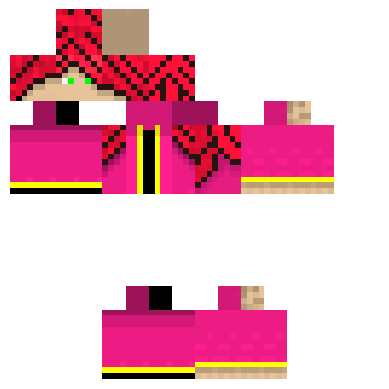

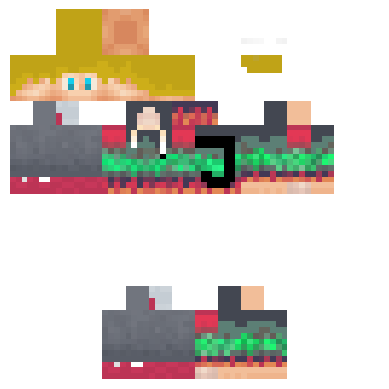

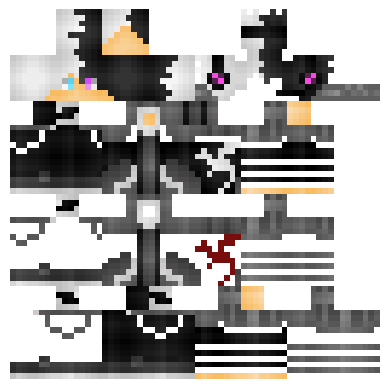

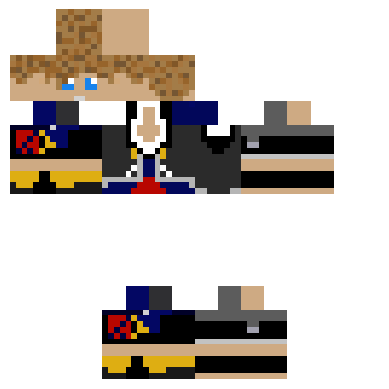

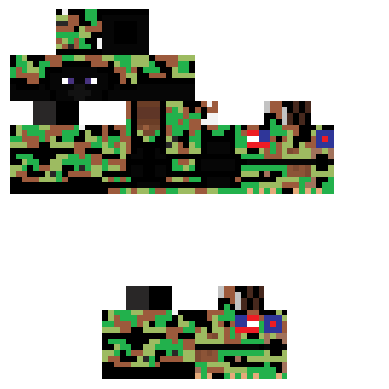

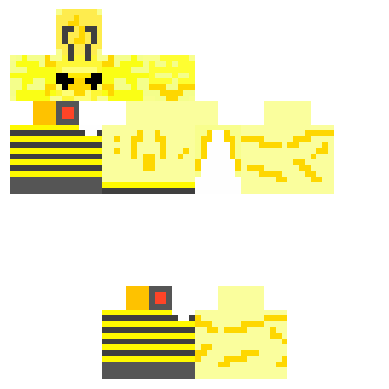

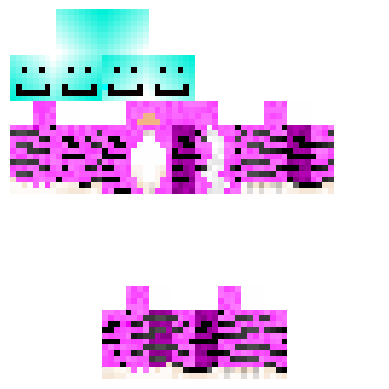

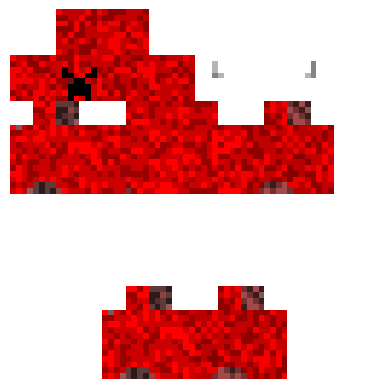

In [21]:
# Create a dataloader to load the images in batches
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate over the dataloader
counter = 0
for batch in dataloader:
    images = batch

    # Display the images
    for image in images:
        # Convert the tensor to a PIL image
        image = transforms.ToPILImage()(image)

        # Display the image
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        counter += 1
        if counter >= 10:
            break

    if counter >= 10:
        break


# Make model

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image

# Generator model with self-attention
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.main = nn.Sequential(
            nn.ConvTranspose2d(self.latent_dim, 512, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            SelfAttention(128),
            nn.ConvTranspose2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 4, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)



# Discriminator model with binary output for each image in the batch
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(4, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5),  # Add dropout layer
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5),  # Add dropout layer
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.linear = nn.Linear(512 * 8 * 8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        output = self.main(input)
        output = output.view(output.size(0), -1)  # Flatten the tensor
        output = self.linear(output)
        output = self.sigmoid(output)
        output = output.view(-1, 1)  # Reshape to have shape (batch_size, 1)
        return output


# Self-Attention module
class SelfAttention(nn.Module):
    def __init__(self, in_dim):
        super(SelfAttention, self).__init__()
        self.query_conv = nn.Conv2d(in_dim, in_dim // 8, kernel_size=1)
        self.key_conv = nn.Conv2d(in_dim, in_dim // 8, kernel_size=1)
        self.value_conv = nn.Conv2d(in_dim, in_dim, kernel_size=1)
        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        m_batchsize, C, width, height = x.size()
        proj_query = self.query_conv(x).view(m_batchsize, -1, width * height).permute(0, 2, 1)
        proj_key = self.key_conv(x).view(m_batchsize, -1, width * height)
        energy = torch.bmm(proj_query, proj_key)
        attention = torch.softmax(energy, dim=1)
        proj_value = self.value_conv(x).view(m_batchsize, -1, width * height)
        out = torch.bmm(proj_value, attention.permute(0, 2, 1))
        out = out.view(m_batchsize, C, width, height)
        out = self.gamma * out + x
        return out


# Train Model

In [23]:
import matplotlib.pyplot as plt

def generate_and_display_images(generator, latent_dim, device):
    # Generate random latent vectors
    latent_vectors = torch.randn(5, latent_dim, 1, 1, device=device)

    # Generate images using the generator
    generated_images = generator(latent_vectors).cpu()

    # Create a grid of generated images
    grid = torchvision.utils.make_grid(generated_images, nrow=5, normalize=True)

    # Display the generated images
    plt.figure(figsize=(10, 2))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.show()


In [24]:
from tqdm import tqdm
from PIL import Image
import torchvision

def train_gan(generator, discriminator, dataloader, num_epochs, latent_dim, lr, device, batch_size):
    # Define loss function and optimizers
    criterion = nn.BCELoss()
    optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    # Training loop
    total_steps = 0
    
    fixed_noise = torch.randn(batch_size, latent_dim, 1, 1, device=device)

    
    for epoch in range(num_epochs):
        progress_bar = tqdm(total=len(dataloader))
        
        for i, real_images in enumerate(dataloader):
            real_images = real_images.to(device)
            batch_size = real_images.size(0)

            # Train the discriminator
            discriminator.zero_grad()

            # Forward pass real images through discriminator
            output_real = discriminator(real_images)
            label_real = torch.full((batch_size, 1), 1.0, device=device)
            
#             print(label_real.shape, output_real.shape)
            
            errD_real = criterion(output_real, label_real)
            errD_real.backward()

            noise = torch.randn(batch_size, latent_dim, 1, 1, device=device)
            fake_images = generator(noise)
            
#             print(fake_images.shape, real_images.shape)

            
            # Forward pass fake images through discriminator
            output_fake = discriminator(fake_images.detach())
            label_fake = torch.full((batch_size, 1), 0.0, device=device)
            errD_fake = criterion(output_fake, label_fake)
            errD_fake.backward()

            errD = errD_real + errD_fake
            optimizer_D.step()

            # Train the generator
            generator.zero_grad()
            label_real = torch.full((batch_size, 1), 1.0, device=device)
            output = discriminator(fake_images)
            errG = criterion(output, label_real)
            errG.backward()
            optimizer_G.step()

            # Update progress bar
            progress_bar.set_postfix({'D loss': errD.item(), 'G loss': errG.item()})
            progress_bar.update()

            total_steps += 1
        
        progress_bar.close()

        # Generate and display images
        generate_and_display_images(generator, latent_dim, device)

        # Save generator model
        torch.save(generator.state_dict(), 'generator.pth')

        # Save discriminator model
        torch.save(discriminator.state_dict(), 'discriminator.pth')

    



100%|██████████| 6687/6687 [13:21<00:00,  8.34it/s, D loss=0.226, G loss=5.42] 


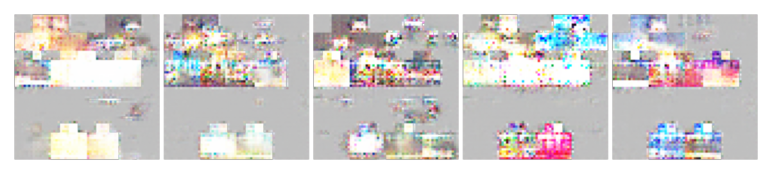

100%|██████████| 6687/6687 [13:41<00:00,  8.14it/s, D loss=0.313, G loss=4.51] 


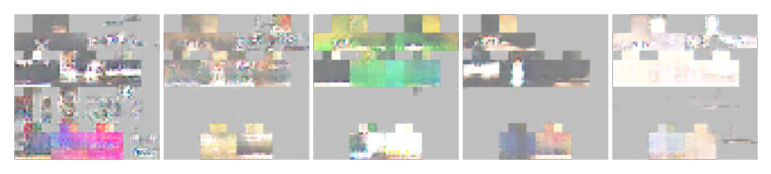

100%|██████████| 6687/6687 [13:08<00:00,  8.49it/s, D loss=0.567, G loss=2.59] 


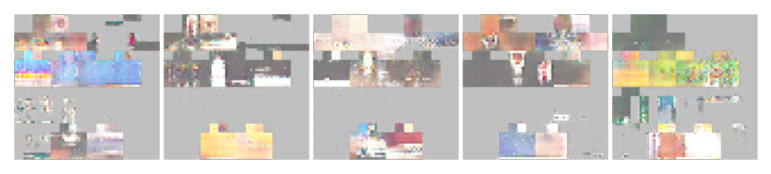

100%|██████████| 6687/6687 [13:06<00:00,  8.50it/s, D loss=0.123, G loss=7.74] 


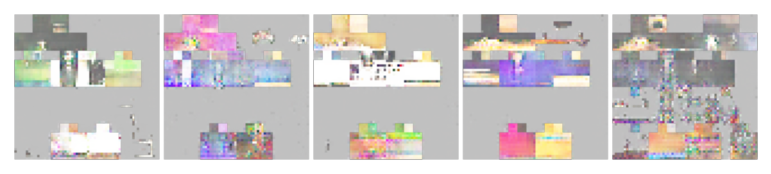

100%|██████████| 6687/6687 [14:19<00:00,  7.78it/s, D loss=0.0638, G loss=4.2]  


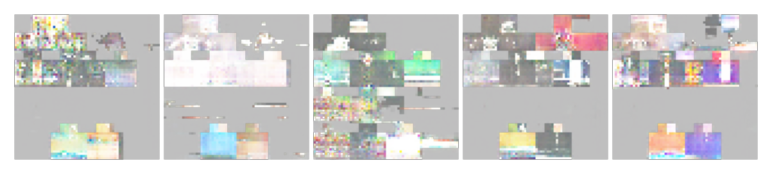

100%|██████████| 6687/6687 [13:16<00:00,  8.40it/s, D loss=0.154, G loss=3]      


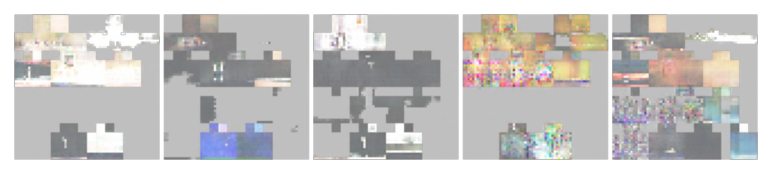

100%|██████████| 6687/6687 [13:31<00:00,  8.24it/s, D loss=0.0639, G loss=5.21] 


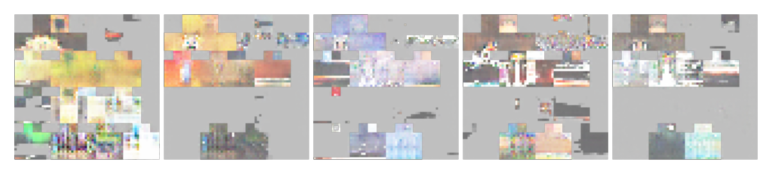

100%|██████████| 6687/6687 [12:50<00:00,  8.68it/s, D loss=0.129, G loss=7.88]  


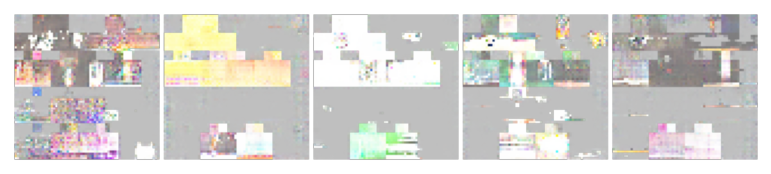

100%|██████████| 6687/6687 [11:57<00:00,  9.32it/s, D loss=0.0631, G loss=9.68] 


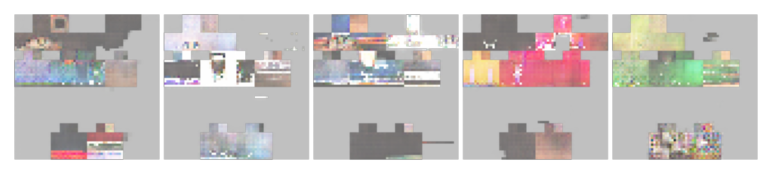

100%|██████████| 6687/6687 [11:26<00:00,  9.74it/s, D loss=0.0114, G loss=7.66]  


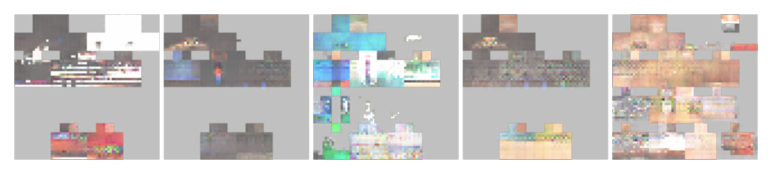

100%|██████████| 6687/6687 [11:18<00:00,  9.86it/s, D loss=0.0294, G loss=10.1]  


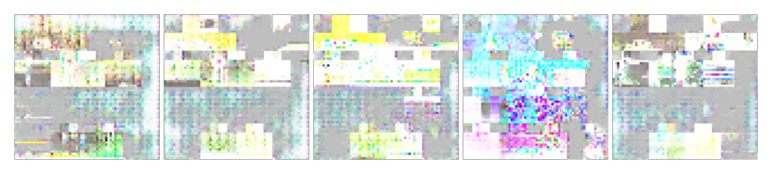

100%|██████████| 6687/6687 [12:33<00:00,  8.87it/s, D loss=0.0752, G loss=5.9]   


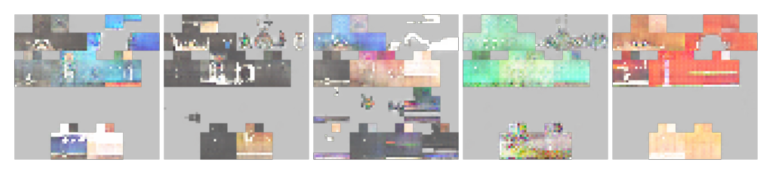

100%|██████████| 6687/6687 [13:06<00:00,  8.50it/s, D loss=0.17, G loss=3.25]    


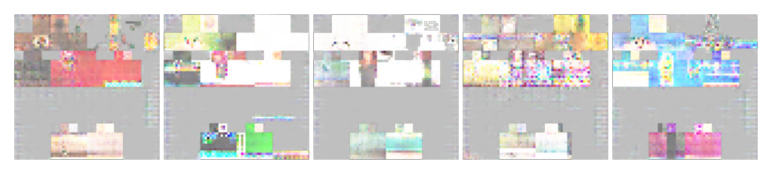

100%|██████████| 6687/6687 [12:23<00:00,  8.99it/s, D loss=0.559, G loss=8.88]   


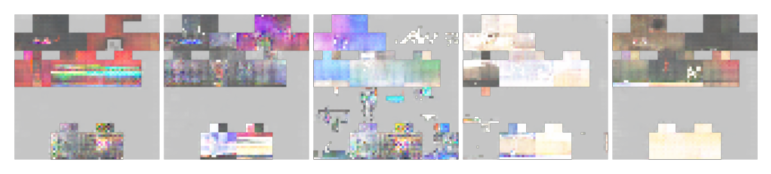

100%|██████████| 6687/6687 [12:59<00:00,  8.58it/s, D loss=0.000935, G loss=9.38]


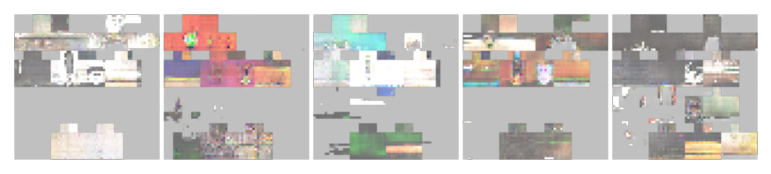

100%|██████████| 6687/6687 [14:36<00:00,  7.63it/s, D loss=0.00305, G loss=9.54] 


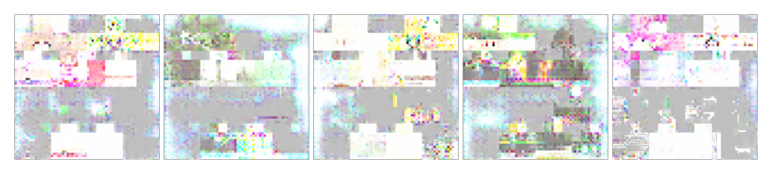

100%|██████████| 6687/6687 [13:56<00:00,  8.00it/s, D loss=1.03, G loss=7.72]    


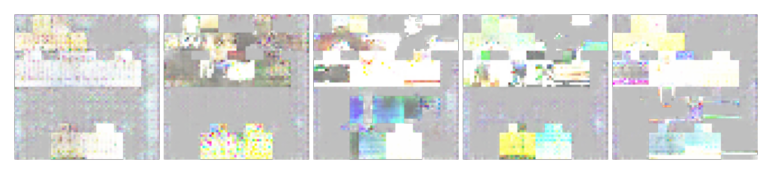

100%|██████████| 6687/6687 [14:29<00:00,  7.69it/s, D loss=0.0191, G loss=8.53]  


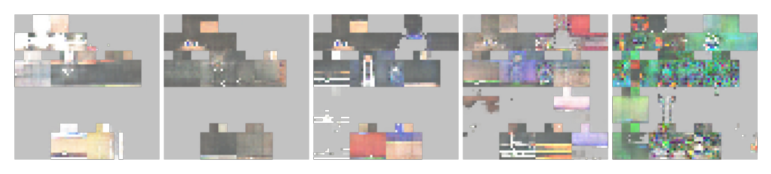

100%|██████████| 6687/6687 [13:01<00:00,  8.56it/s, D loss=0.0645, G loss=7.55]  


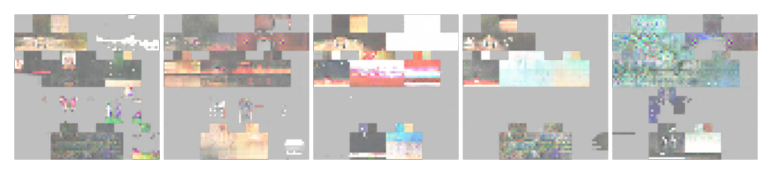

100%|██████████| 6687/6687 [13:49<00:00,  8.06it/s, D loss=0.099, G loss=16.6]   


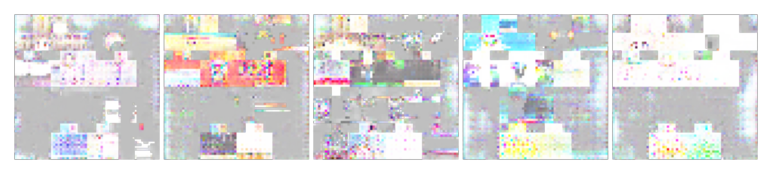

100%|██████████| 6687/6687 [13:23<00:00,  8.33it/s, D loss=0.0275, G loss=10.2]  


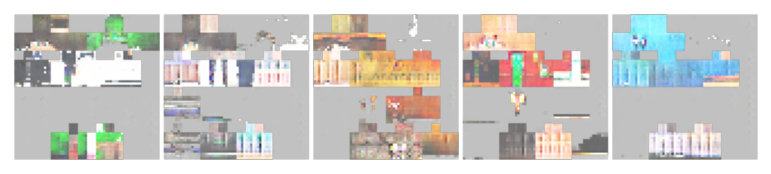

100%|██████████| 6687/6687 [12:14<00:00,  9.10it/s, D loss=0.0405, G loss=10.8]  


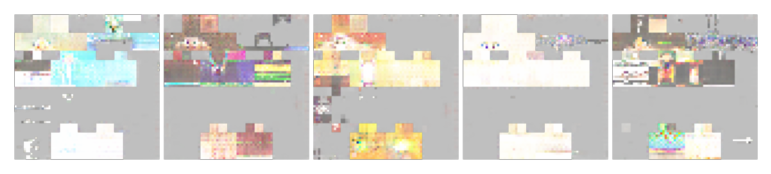

100%|██████████| 6687/6687 [13:24<00:00,  8.31it/s, D loss=0.00509, G loss=5.76] 


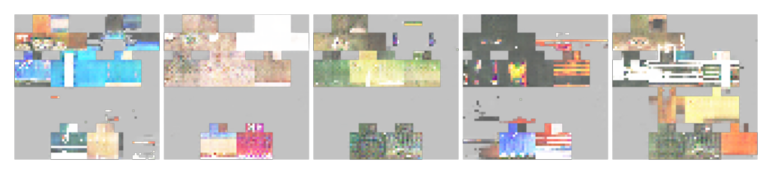

100%|██████████| 6687/6687 [14:17<00:00,  7.80it/s, D loss=0.0512, G loss=17.7]  


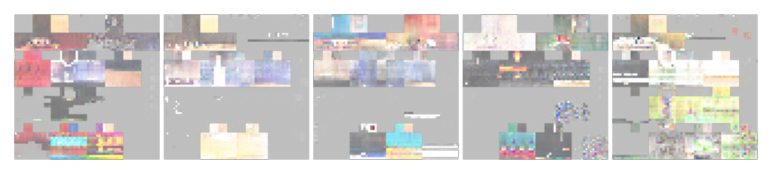

100%|██████████| 6687/6687 [14:34<00:00,  7.65it/s, D loss=0.00249, G loss=12.7] 


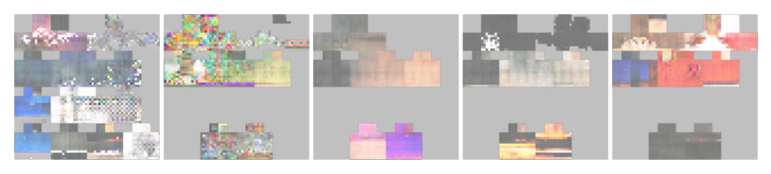

100%|██████████| 6687/6687 [14:59<00:00,  7.44it/s, D loss=0.0659, G loss=8.77]  


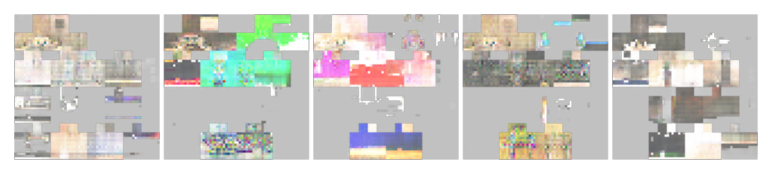

100%|██████████| 6687/6687 [14:22<00:00,  7.75it/s, D loss=0.0439, G loss=9.71]  


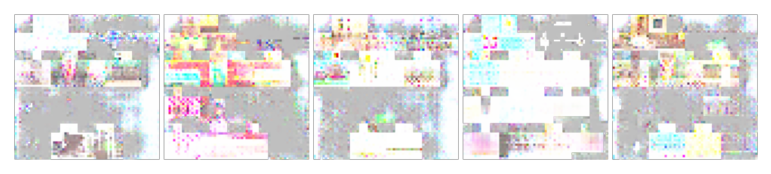

100%|██████████| 6687/6687 [14:48<00:00,  7.53it/s, D loss=0.0567, G loss=9.69]  


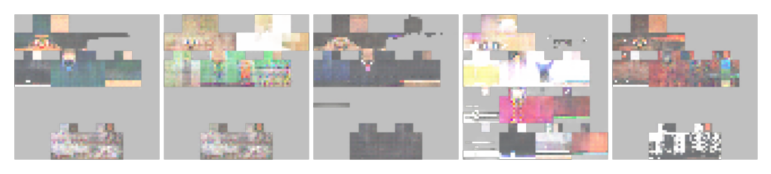

100%|██████████| 6687/6687 [14:40<00:00,  7.59it/s, D loss=0.648, G loss=5.64]   


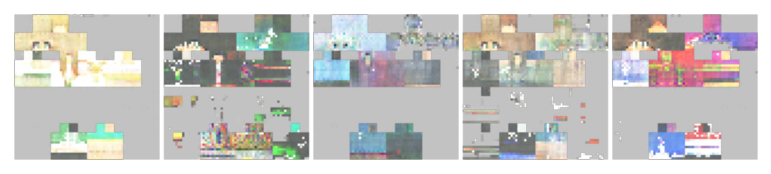

100%|██████████| 6687/6687 [14:14<00:00,  7.82it/s, D loss=0.005, G loss=11.4]   


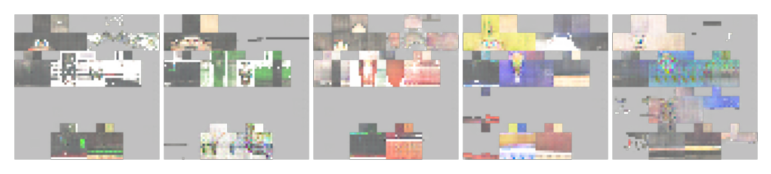

100%|██████████| 6687/6687 [13:29<00:00,  8.27it/s, D loss=0.00527, G loss=8.46] 


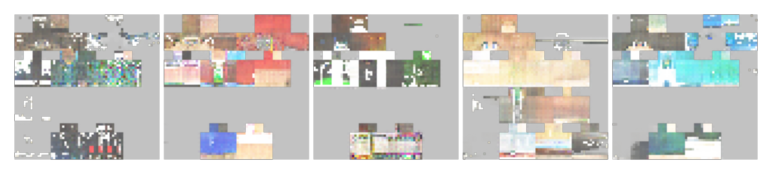

100%|██████████| 6687/6687 [13:33<00:00,  8.22it/s, D loss=0.015, G loss=10.9]   


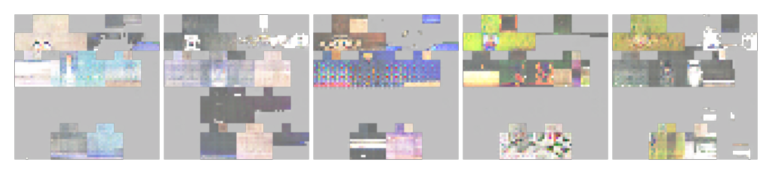

100%|██████████| 6687/6687 [13:24<00:00,  8.31it/s, D loss=0.00474, G loss=11.6] 


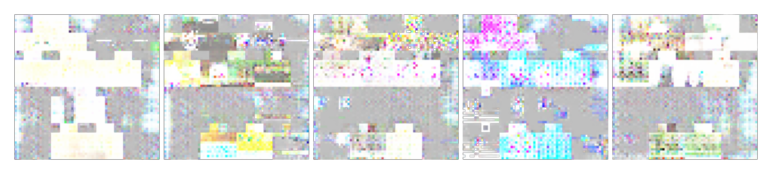

100%|██████████| 6687/6687 [12:31<00:00,  8.90it/s, D loss=0.205, G loss=8.49]   


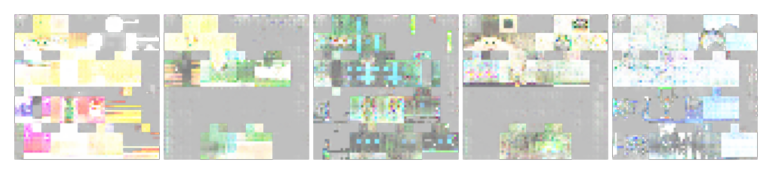

100%|██████████| 6687/6687 [12:32<00:00,  8.89it/s, D loss=0.0328, G loss=9.73]  


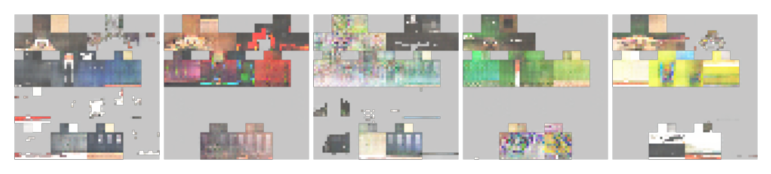

100%|██████████| 6687/6687 [12:20<00:00,  9.03it/s, D loss=0.0452, G loss=7.27]  


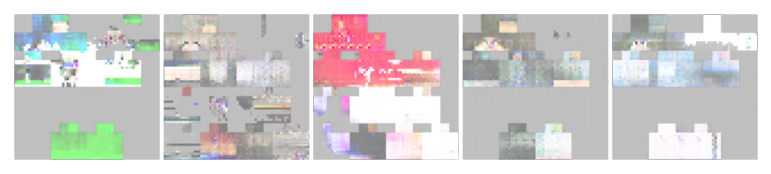

100%|██████████| 6687/6687 [12:39<00:00,  8.80it/s, D loss=0.00159, G loss=8]    


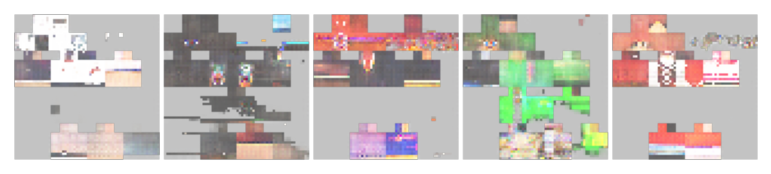

100%|██████████| 6687/6687 [11:54<00:00,  9.36it/s, D loss=0.0636, G loss=8.34]  


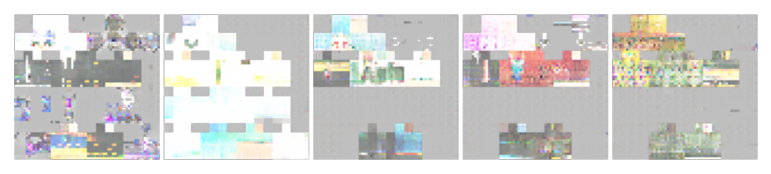

100%|██████████| 6687/6687 [11:40<00:00,  9.55it/s, D loss=0.0519, G loss=11.7]  


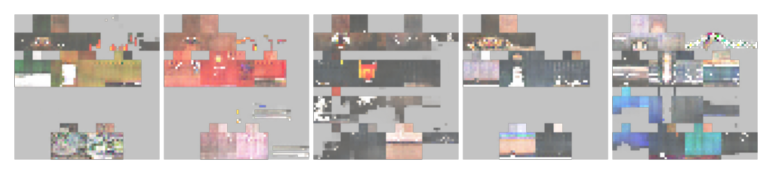

100%|██████████| 6687/6687 [11:46<00:00,  9.46it/s, D loss=0.14, G loss=6.82]    


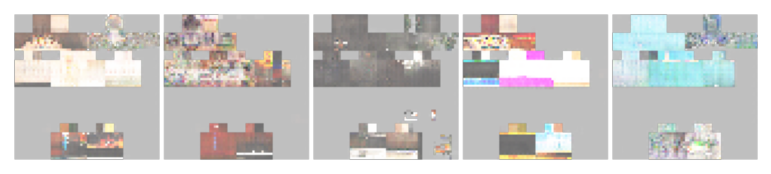

 61%|██████    | 4093/6687 [07:09<04:35,  9.42it/s, D loss=0.0157, G loss=8.06]  

In [ ]:
# Define the latent dimension
latent_dim = 1000

# Create the generator and discriminator models
generator = Generator(latent_dim)
discriminator = Discriminator()

# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

# Call the train_gan function
train_gan(generator, discriminator, dataloader, num_epochs=200, latent_dim=latent_dim, lr=0.0002, device=device, batch_size=batch_size)

In [ ]:
# Save generator model
torch.save(generator.state_dict(), 'generator.pth')

# Save discriminator model
torch.save(discriminator.state_dict(), 'discriminator.pth')
